# week0_10: PyTorch practice, hints and Dataloaders

Credits:
* First part is based on YSDA [Practical RL course week04 materials](https://github.com/yandexdataschool/Practical_RL/tree/master/week04_%5Brecap%5D_deep_learning).
* Second part is based on PyTorch official tutorials and [this kaggle kernel](https://www.kaggle.com/pinocookie/pytorch-dataset-and-dataloader)
* Third part is based on PyTorch tutorial by [Stanford CS 231n course](http://cs231n.stanford.edu)

![img](https://pytorch.org/tutorials/_static/pytorch-logo-dark.svg)

__This notebook__ will teach you to use pytorch low-level core. You can install it [here](http://pytorch.org/).

__Pytorch feels__ differently than other frameworks (like tensorflow/theano) on almost every level. TensorFlow makes your code live in two "worlds" simultaneously:  symbolic graphs and actual tensors. First you declare a symbolic "recipe" of how to get from inputs to outputs, then feed it with actual minibatches of data.  In pytorch, __there's only one world__: all tensors have a numeric value.

You compute outputs on the fly without pre-declaring anything. The code looks exactly as in pure numpy with one exception: pytorch computes gradients for you. And can run stuff on GPU. And has a number of pre-implemented building blocks for your neural nets. [And a few more things.](https://medium.com/towards-data-science/pytorch-vs-tensorflow-spotting-the-difference-25c75777377b)

Let's dive into it!

In [1]:
import matplotlib.pyplot as plt
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import torch
import torchvision
from torch.utils.data import DataLoader, Dataset, Subset
from torchvision import transforms

### Task 2: Using the Dataloader

In [2]:
from torch import nn
from torch.nn import functional as F

In [3]:
# !wget https://raw.githubusercontent.com/neychev/harbour_ml2020/master/day10_Optimization_and_regularization_in_DL/notmnist.py

In [4]:
from notmnist import load_notmnist

In [5]:
X_train, y_train, X_test, y_test = load_notmnist()

Parsing...
found broken img: ./notMNIST_small/F/Q3Jvc3NvdmVyIEJvbGRPYmxpcXVlLnR0Zg==.png [it's ok if <10 images are broken]
found broken img: ./notMNIST_small/A/RGVtb2NyYXRpY2FCb2xkT2xkc3R5bGUgQm9sZC50dGY=.png [it's ok if <10 images are broken]
Done


In [6]:
class DatasetMNIST(Dataset):
    def __init__(self, path="./notMNIST_small", letters="ABCDEFGHIJ", transform=None):
        self.data, self.labels, _, _ = load_notmnist(path=path, letters=letters, test_size=0.25)
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        # load image as ndarray type (Height * Width * Channels)
        # be carefull for converting dtype to np.uint8 [Unsigned integer (0 to 255)]
        # in this example, i don't use ToTensor() method of torchvision.transforms
        # so you can convert numpy ndarray shape to tensor in PyTorch (H, W, C) --> (C, H, W)
        image = self.data[index].transpose(1, 2, 0)
        label = self.labels[index]

        if self.transform is not None:
            image = self.transform(image)

        return image, label

In [7]:
full_dataset = DatasetMNIST("./notMNIST_small", "AB", transform=None)

Parsing...
found broken img: ./notMNIST_small/A/RGVtb2NyYXRpY2FCb2xkT2xkc3R5bGUgQm9sZC50dGY=.png [it's ok if <10 images are broken]
Done


In [8]:
# we can access and get data with index by __getitem__(index)
img, lab = full_dataset.__getitem__(0)

print(img.shape)
print(type(img))

(28, 28, 1)
<class 'numpy.ndarray'>


In [9]:
a = torchvision.transforms.ToTensor()

a(img).shape

torch.Size([1, 28, 28])

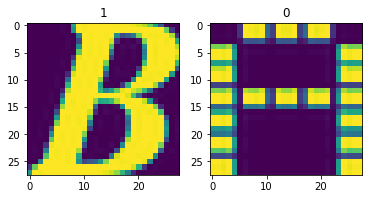

In [10]:
inds = np.random.randint(len(full_dataset), size=2)

for i in range(2):
    plt.subplot(1, 2, i + 1)
    plt.imshow(full_dataset[inds[i]][0].reshape([28, 28]))
    plt.title(str(full_dataset[inds[i]][1]))

#### To the DataLoader

In [11]:
train_loader = DataLoader(full_dataset, batch_size=8, shuffle=True)

We can use dataloader as iterator by using iter() function.

In [12]:
train_iter = iter(train_loader)
print(type(train_iter))

<class 'torch.utils.data.dataloader._SingleProcessDataLoaderIter'>


We can look at images and labels of batch size by extracting data `.next()` method.

In [13]:
images, labels = train_iter.next()

print("images shape on batch size = {}".format(images.size()))
print("labels shape on batch size = {}".format(labels.size()))

images shape on batch size = torch.Size([8, 28, 28, 1])
labels shape on batch size = torch.Size([8])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/home/berend/anaconda3/envs/torch/lib/python3.8/site-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


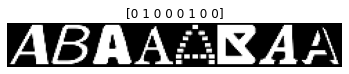

In [14]:
# make grid takes tensor as arg
# tensor : (batchsize, channels, height, width)
grid = torchvision.utils.make_grid(images.permute([0, 3, 1, 2]))

plt.imshow(grid.numpy().transpose((1, 2, 0)))
plt.axis("off")
plt.title(labels.numpy());

And now with transformations:

In [15]:
train_dataset_with_transform = DatasetMNIST(transform=torchvision.transforms.ToTensor())

Parsing...
found broken img: ./notMNIST_small/F/Q3Jvc3NvdmVyIEJvbGRPYmxpcXVlLnR0Zg==.png [it's ok if <10 images are broken]
found broken img: ./notMNIST_small/A/RGVtb2NyYXRpY2FCb2xkT2xkc3R5bGUgQm9sZC50dGY=.png [it's ok if <10 images are broken]
Done


In [16]:
img, lab = train_dataset_with_transform.__getitem__(0)

print("image shape at the first row : {}".format(img.size()))

image shape at the first row : torch.Size([1, 28, 28])


In [17]:
train_loader_tr = DataLoader(train_dataset_with_transform, batch_size=8, shuffle=True)

train_iter_tr = iter(train_loader_tr)
print(type(train_iter_tr))

images, labels = train_iter_tr.next()

print("images shape on batch size = {}".format(images.size()))
print("labels shape on batch size = {}".format(labels.size()))

<class 'torch.utils.data.dataloader._SingleProcessDataLoaderIter'>
images shape on batch size = torch.Size([8, 1, 28, 28])
labels shape on batch size = torch.Size([8])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


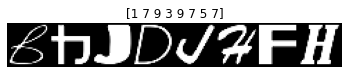

In [18]:
grid = torchvision.utils.make_grid(images)

plt.imshow(grid.numpy().transpose((1, 2, 0)))
plt.axis("off")
plt.title(labels.numpy());

### Composing several transformations

If you want to take data augmentation, you have to make List using `torchvision.transforms.Compose`

```
class Compose(object):
    """Composes several transforms together.
    Args:
        transforms (list of ``Transform`` objects): list of transforms to compose.
    Example:
        >>> transforms.Compose([
        >>>     transforms.CenterCrop(10),
        >>>     transforms.ToTensor(),
        >>> ])
    """

    def __init__(self, transforms):
        self.transforms = transforms

    def __call__(self, img):
        for t in self.transforms:
            img = t(img)
        return img

    def __repr__(self):
        format_string = self.__class__.__name__ + '('
        for t in self.transforms:
            format_string += '\n'
            format_string += '    {0}'.format(t)
        format_string += '\n)'
        return format_string
```


this function can convert some image by order within `__call__` method.

In [19]:
class Flatten:
    def __call__(self, pic):
        return pic.flatten()

    def __repr__(self):
        return self.__class__.__name__ + "()"

In [20]:
a = Flatten()

In [21]:
a(img).shape

torch.Size([784])

In [22]:
new_transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(), Flatten()])

# Putting all together

In [23]:
import time

from IPython.display import clear_output

In [24]:
torch.cuda.is_available()

True

In [25]:
# use GPU if available
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
device

device(type='cuda')

In [26]:
def subset_ind(dataset, ratio: float):
    return torch.randint(len(dataset), (int(len(dataset) * ratio), ))

In [27]:
dataset = DatasetMNIST(
    "./notMNIST_small",
    #   "AB",
    transform=new_transform,
)

shrink_inds = subset_ind(dataset, 0.2)
dataset = Subset(dataset, shrink_inds)

print(f"\n\n dataset size: {len(dataset)}, labels: {np.unique(dataset.dataset.labels)}")

Parsing...
found broken img: ./notMNIST_small/F/Q3Jvc3NvdmVyIEJvbGRPYmxpcXVlLnR0Zg==.png [it's ok if <10 images are broken]
found broken img: ./notMNIST_small/A/RGVtb2NyYXRpY2FCb2xkT2xkc3R5bGUgQm9sZC50dGY=.png [it's ok if <10 images are broken]
Done


 dataset size: 2808, labels: [0 1 2 3 4 5 6 7 8 9]


In [28]:
val_size = 0.2
val_inds = subset_ind(dataset, val_size)

train_dataset = Subset(dataset, [i for i in range(len(dataset)) if i not in val_inds])
val_dataset = Subset(dataset, val_inds)

print(f"  training size: {len(train_dataset)}\nvalidation size: {len(val_dataset)}")

  training size: 2295
validation size: 561


In [29]:
batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)


In [30]:
train_iter = iter(train_loader)
print(type(train_iter))

images, labels = train_iter.next()

print("images shape on batch size = {}".format(images.size()))
print("labels shape on batch size = {}".format(labels.size()))

<class 'torch.utils.data.dataloader._SingleProcessDataLoaderIter'>
images shape on batch size = torch.Size([32, 784])
labels shape on batch size = torch.Size([32])


In [31]:
loss_func = nn.CrossEntropyLoss()

In [39]:
# create network again just in case
model = nn.Sequential(
    nn.Linear(784, 10),
    nn.Sigmoid(),
)
model.to(device)

opt = torch.optim.Adam(model.parameters(), lr=1e-3)

In [33]:
torch.cuda.get_device_name(0)

'GeForce RTX 2060'

In [34]:
train_loader

In [35]:
from sklearn.metrics import accuracy_score

In [107]:
def train_model(model, train_loader, val_loader, loss_fn, opt, n_epochs: int):
    """
    model: нейросеть для обучения,
    train_loader, val_loader: загрузчики данных
    loss_fn: целевая метрика (которую будем оптимизировать)
    opt: оптимизатор (обновляет веса нейросети)
    n_epochs: кол-во эпох, полных проходов датасета
    """
    train_loss = []
    val_loss = []
    val_accuracy = []

    for epoch in range(n_epochs):
        ep_train_loss = []
        ep_val_loss = []
        ep_val_accuracy = []
        start_time = time.time()

        model.train(True)  # enable dropout / batch_norm training behavior
        for X_batch, y_batch in train_loader:
            # move data to target device
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)

            # train on batch: compute loss, calc grads, perform optimizer step and zero the grads
            # Forward pass
            preds = model(X_batch)
            
            # Compute loss
            loss = loss_fn(preds, y_batch)
            
            # Backward pass, compute gradient
            loss.backward()
            
            # Optimization step - train model weights
            opt.step()
            
            # Clear gradients
            opt.zero_grad()
            
            ep_train_loss.append(loss.item())

        model.train(False)  # disable dropout / use averages for batch_norm
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                # move data to target deviceRuntimeError: Tensor for argument #2 'mat1' is on CPU, but expected it to be on GPU (while checking arguments for addmm)
                X_batch = X_batch.to(device)
                y_batch = y_batch.to(device)
                
                # preds
                preds = model(X_batch)
                loss = loss_fn(preds, y_batch)

                # compute predictions
                ### YOUR CODE HERE
                ep_val_loss.append(loss)  # YOUR CODE HERE)
                y_pred = preds.argmax(dim=1)  # YOUR CODE HERE
                ep_val_accuracy.append(accuracy_score(y_batch.cpu(), y_pred.cpu()))  # YOUR CODE HERE)

        # print the results for this epoch:
        print(f"Epoch {epoch + 1} of {n_epochs} took {time.time() - start_time:.3f}s")

        train_loss.append(np.mean(ep_train_loss))

        mean_ep_val_loss = torch.mean(torch.stack(ep_val_loss)).tolist()
        val_loss.append(mean_ep_val_loss)
        val_accuracy.append(np.mean(ep_val_accuracy))

        print(f"\t  training loss: {train_loss[-1]:.6f}")
        print(f"\tvalidation loss: {val_loss[-1]:.6f}")
        print(f"\tvalidation accuracy: {val_accuracy[-1]:.3f}")

    return train_loss, val_loss, val_accuracy

In [42]:
next(model.parameters()).is_cuda

True

In [110]:
n_epochs = 30

train_loss, val_loss, val_accuracy = train_model(
    model, train_loader, val_loader, loss_func, opt, n_epochs
)

Epoch 1 of 30 took 0.085s
	  training loss: 1.499825
	validation loss: 1.591293
	validation accuracy: 0.875
Epoch 2 of 30 took 0.076s
	  training loss: 1.499517
	validation loss: 1.594366
	validation accuracy: 0.873
Epoch 3 of 30 took 0.076s
	  training loss: 1.499829
	validation loss: 1.593178
	validation accuracy: 0.872
Epoch 4 of 30 took 0.081s
	  training loss: 1.499571
	validation loss: 1.591345
	validation accuracy: 0.877
Epoch 5 of 30 took 0.080s
	  training loss: 1.499540
	validation loss: 1.595147
	validation accuracy: 0.874
Epoch 6 of 30 took 0.080s
	  training loss: 1.499327
	validation loss: 1.596363
	validation accuracy: 0.871
Epoch 7 of 30 took 0.082s
	  training loss: 1.499383
	validation loss: 1.590056
	validation accuracy: 0.875
Epoch 8 of 30 took 0.081s
	  training loss: 1.499187
	validation loss: 1.591631
	validation accuracy: 0.878
Epoch 9 of 30 took 0.083s
	  training loss: 1.498984
	validation loss: 1.594013
	validation accuracy: 0.875
Epoch 10 of 30 took 0.087s
	

In [111]:
def plot_train_process(train_loss, val_loss, val_accuracy):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    axes[0].set_title("Loss")
    axes[0].plot(train_loss, label="train")
    axes[0].plot(val_loss, label="validation")
    axes[0].legend()

    axes[1].set_title("Validation accuracy")
    axes[1].plot(val_accuracy)

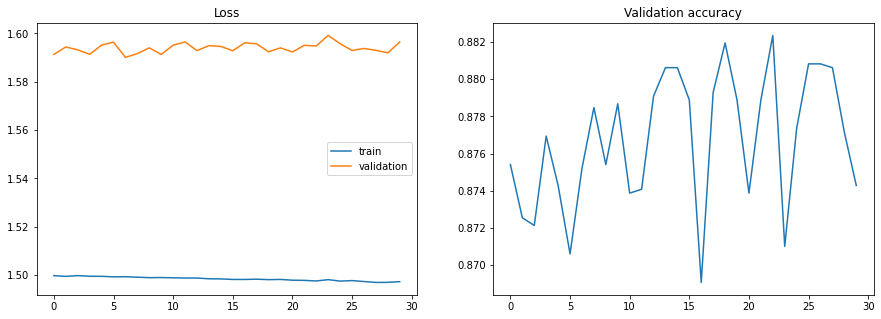

In [112]:
plot_train_process(train_loss, val_loss, val_accuracy)

## Real network

In [113]:
# create network again just in case
model = nn.Sequential(
    nn.Linear(784, 500),
    nn.ReLU(),
    nn.Linear(500, 200),
    nn.ReLU(),
    nn.Linear(200, 10),
    nn.Sigmoid(),
)
model.to(device, torch.float32)

opt = torch.optim.Adam(model.parameters(), lr=1e-3)

In [114]:
n_epochs = 30

train_loss, val_loss, val_accuracy = train_model(
    model, train_loader, val_loader, loss_func, opt, n_epochs
)

Epoch 1 of 30 took 0.129s
	  training loss: 1.734707
	validation loss: 1.612548
	validation accuracy: 0.783
Epoch 2 of 30 took 0.114s
	  training loss: 1.582587
	validation loss: 1.582664
	validation accuracy: 0.867
Epoch 3 of 30 took 0.117s
	  training loss: 1.548743
	validation loss: 1.582069
	validation accuracy: 0.865
Epoch 4 of 30 took 0.115s
	  training loss: 1.533446
	validation loss: 1.560900
	validation accuracy: 0.886
Epoch 5 of 30 took 0.120s
	  training loss: 1.518037
	validation loss: 1.567576
	validation accuracy: 0.877
Epoch 6 of 30 took 0.115s
	  training loss: 1.514280
	validation loss: 1.560372
	validation accuracy: 0.881
Epoch 7 of 30 took 0.118s
	  training loss: 1.505681
	validation loss: 1.559169
	validation accuracy: 0.895
Epoch 8 of 30 took 0.114s
	  training loss: 1.501916
	validation loss: 1.566900
	validation accuracy: 0.884
Epoch 9 of 30 took 0.118s
	  training loss: 1.500961
	validation loss: 1.567923
	validation accuracy: 0.893
Epoch 10 of 30 took 0.116s
	

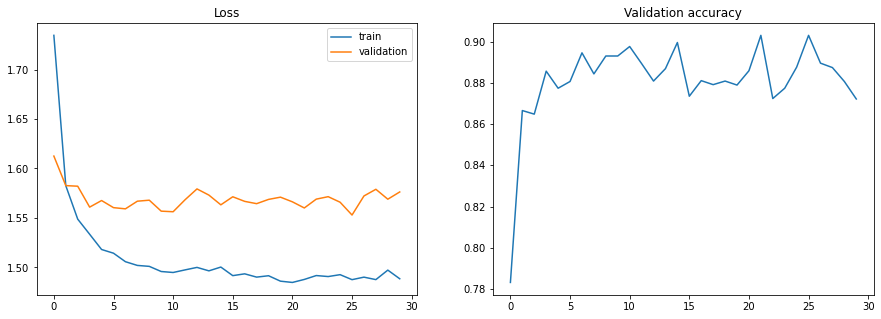

In [115]:
plot_train_process(train_loss, val_loss, val_accuracy)

## Overfit!!!

In [122]:
# create network again just in case
model = nn.Sequential(
    nn.Linear(784, 600),
    nn.ReLU(),
    nn.Linear(600, 500),
    nn.ReLU(),
    nn.Linear(500, 500),
    nn.ReLU(),
    nn.Linear(500, 200),
    nn.ReLU(),
    nn.Linear(200, 10),
    nn.Sigmoid(),
)
model.to(device, torch.float32)

opt = torch.optim.Adam(model.parameters(), lr=1e-3)

In [123]:
n_epochs = 30

train_loss, val_loss, val_accuracy = train_model(
    model, train_loader, val_loader, loss_func, opt, n_epochs
)

Epoch 1 of 30 took 0.161s
	  training loss: 1.781824
	validation loss: 1.660015
	validation accuracy: 0.763
Epoch 2 of 30 took 0.153s
	  training loss: 1.636663
	validation loss: 1.642532
	validation accuracy: 0.678
Epoch 3 of 30 took 0.156s
	  training loss: 1.615513
	validation loss: 1.613765
	validation accuracy: 0.748
Epoch 4 of 30 took 0.151s
	  training loss: 1.609553
	validation loss: 1.605533
	validation accuracy: 0.773
Epoch 5 of 30 took 0.152s
	  training loss: 1.602927
	validation loss: 1.633564
	validation accuracy: 0.692
Epoch 6 of 30 took 0.154s
	  training loss: 1.615995
	validation loss: 1.623312
	validation accuracy: 0.674
Epoch 7 of 30 took 0.152s
	  training loss: 1.612478
	validation loss: 1.632328
	validation accuracy: 0.645
Epoch 8 of 30 took 0.149s
	  training loss: 1.626819
	validation loss: 1.636531
	validation accuracy: 0.668
Epoch 9 of 30 took 0.156s
	  training loss: 1.628291
	validation loss: 1.667125
	validation accuracy: 0.608
Epoch 10 of 30 took 0.158s
	

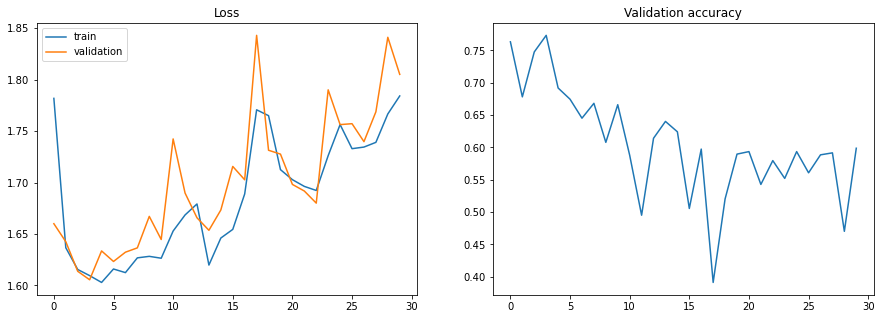

In [124]:
plot_train_process(train_loss, val_loss, val_accuracy)

## Your turn
Try to add some additional transformations (e.g. random crop, rotation etc.) and train your model!

### Dropout try

### Batchnorm try

### 3. Save the model (model checkpointing)

Now we have trained a model! Obviously we do not want to retrain the model everytime we want to use it. Plus if you are training a super big model, you probably want to save checkpoint periodically so that you can always fall back to the last checkpoint in case something bad happened or you simply want to test models at different training iterations.

Model checkpointing is fairly simple in PyTorch. First, we define a helper function that can save a model to the disk

In [125]:
def save_checkpoint(checkpoint_path, model, optimizer):
    # state_dict: a Python dictionary object that:
    # - for a model, maps each layer to its parameter tensor;
    # - for an optimizer, contains info about the optimizer’s states and hyperparameters used.
    state = {"state_dict": model.state_dict(), "optimizer": optimizer.state_dict()}
    torch.save(state, checkpoint_path)
    print("model saved to %s" % checkpoint_path)


def load_checkpoint(checkpoint_path, model, optimizer):
    state = torch.load(checkpoint_path)
    model.load_state_dict(state["state_dict"])
    optimizer.load_state_dict(state["optimizer"])
    print("model loaded from %s" % checkpoint_path)

In [126]:
# create a brand new model
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
# Testing -- you should get a pretty poor performance since the model hasn't learned anything yet.
test()

NameError: name 'Net' is not defined

#### Define a training loop with model checkpointing

In [ ]:
def train_save(epoch, save_interval, log_interval=100):
    model.train()  # set training mode
    iteration = 0
    for ep in range(epoch):
        for batch_idx, (data, target) in enumerate(trainset_loader):
            data, target = data.to(device), target.to(device)
            optimizer.zero_grad()
            output = model(data)
            loss = F.nll_loss(output, target)
            loss.backward()
            optimizer.step()
            if iteration % log_interval == 0:
                print(
                    "Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}".format(
                        ep,
                        batch_idx * len(data),
                        len(trainset_loader.dataset),
                        100.0 * batch_idx / len(trainset_loader),
                        loss.item(),
                    )
                )
            # different from before: saving model checkpoints
            if iteration % save_interval == 0 and iteration > 0:
                save_checkpoint("mnist-%i.pth" % iteration, model, optimizer)
            iteration += 1
        test()

    # save the final model
    save_checkpoint("mnist-%i.pth" % iteration, model, optimizer)

In [ ]:
train_save(5, save_interval=500, log_interval=100)

In [ ]:
# create a new model
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
# load from the final checkpoint
load_checkpoint("mnist-4690.pth", model, optimizer)
# should give you the final model accuracy
test()

### More about pytorch:
* Using torch on GPU and multi-GPU - [link](http://pytorch.org/docs/master/notes/cuda.html)
* More tutorials on pytorch - [link](http://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)
* Pytorch examples - a repo that implements many cool DL models in pytorch - [link](https://github.com/pytorch/examples)
* Practical pytorch - a repo that implements some... other cool DL models... yes, in pytorch - [link](https://github.com/spro/practical-pytorch)
* And some more - [link](https://www.reddit.com/r/pytorch/comments/6z0yeo/pytorch_and_pytorch_tricks_for_kaggle/)